In [18]:
# Need to do this before importing RV when running in a Docker container from VS Code.
# This has to do with the fact that VS Code is not setting env vars in the notebook correctly.
import os
os.environ['GDAL_DATA'] = '/opt/conda/lib/python3.7/site-packages/rasterio/gdal_data/'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
from os.path import join

import matplotlib.pyplot as plt

from rastervision.pytorch_learner.dataset import (
    SemanticSegmentationSlidingWindowGeoDataset, 
    ObjectDetectionSlidingWindowGeoDataset,
    ClassificationSlidingWindowGeoDataset)
from rastervision.pytorch_learner.visualizer import (
    SemanticSegmentationVisualizer, 
    ObjectDetectionVisualizer,
    ClassificationVisualizer)
from rastervision.core.data import ClassConfig

In [20]:
class_names = ['Building', 'Background']
class_colors = ['orange', 'black']
class_config = ClassConfig(names=class_names)
channel_order = [0, 1, 2, 3]
channel_display_groups = {'RGB': (0, 1, 2), 'IR': (3, )}

root_uri = '/opt/data/spacenet-sample'
image_uri = join(root_uri, 'SN2_buildings_train_AOI_5_Khartoum_PS-MS_img1003.tiff')
label_uri = join(
    root_uri, 'SN2_buildings_train_AOI_5_Khartoum_geojson_buildings_img1003.geojson')

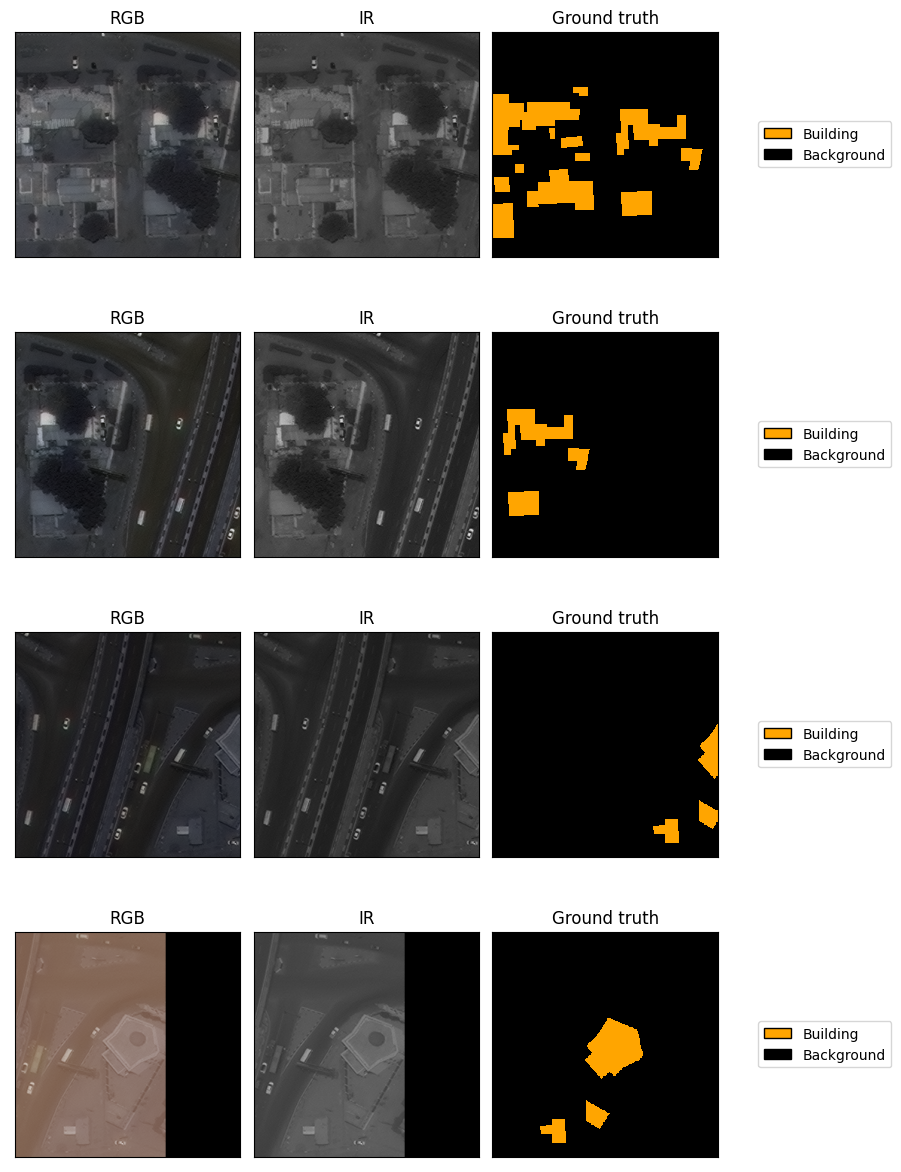

In [21]:
ds = SemanticSegmentationSlidingWindowGeoDataset.from_uris(
    class_config=class_config,
    image_uri=image_uri,
    label_vector_uri=label_uri,
    size=300,
    stride=150,
    label_vector_default_class_id=0,
    label_raster_source_kw={'background_class_id': 1})
    
vis = SemanticSegmentationVisualizer(
    class_names=class_names, class_colors=class_colors,
    channel_display_groups=channel_display_groups)
x, y = vis.get_batch(ds, 4)
vis.plot_batch(x, y, show=True)

AttributeError: 'tuple' object has no attribute 'boxes'

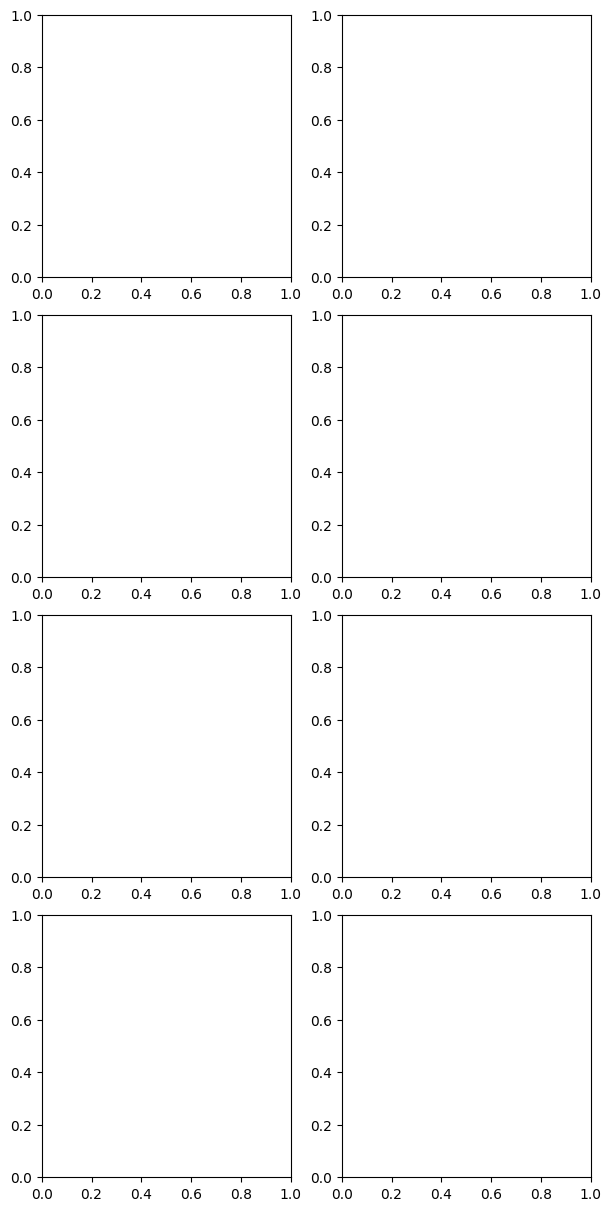

In [33]:
# TODO if you don't set label_vector_default_class_id, it will filter out all the ids

ds = ObjectDetectionSlidingWindowGeoDataset.from_uris(
    class_config=class_config,
    image_uri=image_uri,
    label_vector_uri=label_uri,
    size=300,
    stride=150,
    label_vector_default_class_id=0,
    image_raster_source_kw={'channel_order': channel_order})

vis = ObjectDetectionVisualizer(
    class_names=class_names, class_colors=class_colors,
    channel_display_groups=channel_display_groups)
x, y = vis.get_batch(ds, 4)

# y is in tuple format, but needs to be in boxlist format
# we should make visualizer take tuple format
# how to convert from tuple to boxlist?

vis.plot_batch(x, y, show=True)

In [24]:
ds = ClassificationSlidingWindowGeoDataset.from_uris(
    class_config=class_config,
    image_uri=image_uri,
    label_vector_uri=label_uri,
    size=300,
    stride=150,
    label_vector_default_class_id=0,
    label_source_kw={
        'ioa_thresh': 0.5,
        'use_intersection_over_cell': False,
        'pick_min_class_id': False,
        'background_class_id': 1,
        'infer_cells': True
    },
    image_raster_source_kw={'channel_order': channel_order})

vis = ClassificationVisualizer(
    class_names=class_names, class_colors=class_colors,
    channel_display_groups=channel_display_groups)
x, y = vis.get_batch(ds, 4)
vis.plot_batch(x, y, show=True)

TypeError: unsupported operand type(s) for -: 'int' and 'NoneType'